In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

### read all datasets

In [2]:
internetPjl = pd.read_csv('../data/2015-2018年各省互联网普及率.csv',encoding='GBK')
GDP = pd.read_csv('../data/2019年前三季度各省市GDP.csv',encoding='GBK')
company = pd.read_csv('../data/cleaned_compc.csv',encoding='GBK')
schoolpop = pd.read_csv('../data/schoolpop.csv',encoding='GBK')
dzdp = pd.read_csv('../data/大众点评.csv',encoding='utf-8')
baiduss = pd.read_csv('../data/关注度.csv',encoding='utf-8')

C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
company['省份赋值'] = 1  #方便计算公司数量
summarized_company = company.groupby(by = '所属省份')['省份赋值'].sum()
summarized_company = pd.DataFrame(summarized_company)
company_account = summarized_company.reset_index()
company_account = company_account.rename(columns = {'所属省份':'省份/直辖市','省份赋值':'少儿编程公司数量'})
#print(company_account['少儿编程公司数量'].sum())
#company_account

In [4]:
baiduss = baiduss.rename(columns = {'省份':'省份/直辖市','搜索指数日均值':'百度搜索指数'})
baiduss = baiduss.sort_values(by = '百度搜索指数',axis = 0,ascending = True)
#baiduss

In [5]:
internetPjl2018 = internetPjl[['省市','2018年互联网普及率%']]
internetPjl2018 = internetPjl2018.rename(columns = {'省市':'省份/直辖市'})
#internetPjl2018

In [6]:
provGDP = GDP[['省份/直辖市','省份/直辖市GDP总量（2019年前三季度）亿元']]
provGDP = provGDP.drop_duplicates()
provGDP = provGDP.rename(columns = {'省份/直辖市GDP总量（2019年前三季度）亿元':'GDP总量（2019年前三季度）亿元'})
#provGDP

In [7]:
zxrk = schoolpop[['省份','小初高人口合计（万人）']]
zxrk = zxrk.rename(columns = {'省份':'省份/直辖市','小初高人口合计（万人）':'小初高在校人口数（万人）'})
zxrk = zxrk.dropna()
#zxrk

In [8]:
provdzdp = dzdp.groupby(by = '省市')['搜索“少儿编程”结果数量'].sum()
provdzdp = pd.DataFrame(provdzdp)
provdzdp
provdzdp_search = provdzdp.reset_index()
provdzdp_search = provdzdp_search.rename(columns = {'省市':'省份/直辖市','搜索“少儿编程”结果数量':'大众点评搜索数量'})
#provdzdp_search

### merge all data into one dataframe 

In [9]:
alldata = [provGDP,internetPjl2018,baiduss,company_account,zxrk,provdzdp_search]
finaldf = pd.DataFrame({'省份/直辖市':baiduss['省份/直辖市']})
for table in alldata:
    finaldf = pd.merge(finaldf,table,how='outer')
finaldf = finaldf.fillna(0)
finaldf = finaldf.sort_values(by = '少儿编程公司数量',axis = 0,ascending = True)
finaldf.set_index(["省份/直辖市"], inplace=True)
#finaldf

In [10]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 西藏 to 广东
Data columns (total 6 columns):
GDP总量（2019年前三季度）亿元    31 non-null int64
2018年互联网普及率%          31 non-null int64
百度搜索指数                31 non-null int64
少儿编程公司数量              31 non-null float64
小初高在校人口数（万人）          31 non-null float64
大众点评搜索数量              31 non-null float64
dtypes: float64(3), int64(3)
memory usage: 1.7+ KB


### visualize data

- **The number of youth programing education enterprises & The number of offline Youth programing training institutions on dianping by province**

    - Bar chart

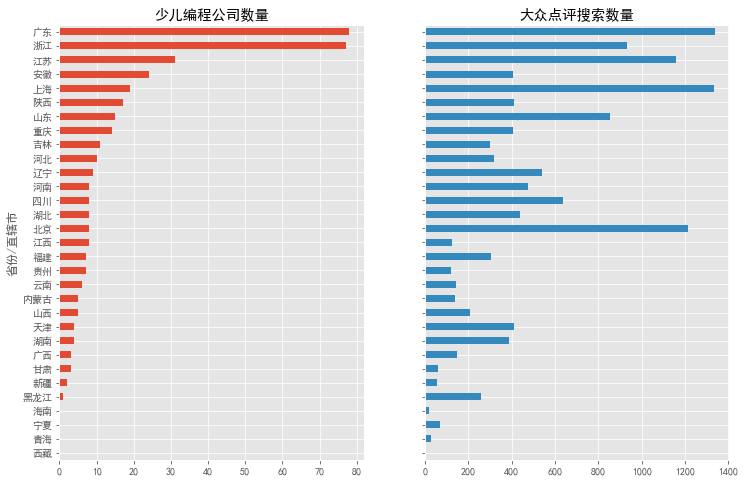

In [11]:
dzdp_comp= finaldf[['少儿编程公司数量','大众点评搜索数量']]
plt.style.use('ggplot')
# 正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

dzdp_comp.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False,
               figsize=(12, 8))
plt.savefig('./comp_dzdp.jpg')
plt.show()

    - Bubble chart

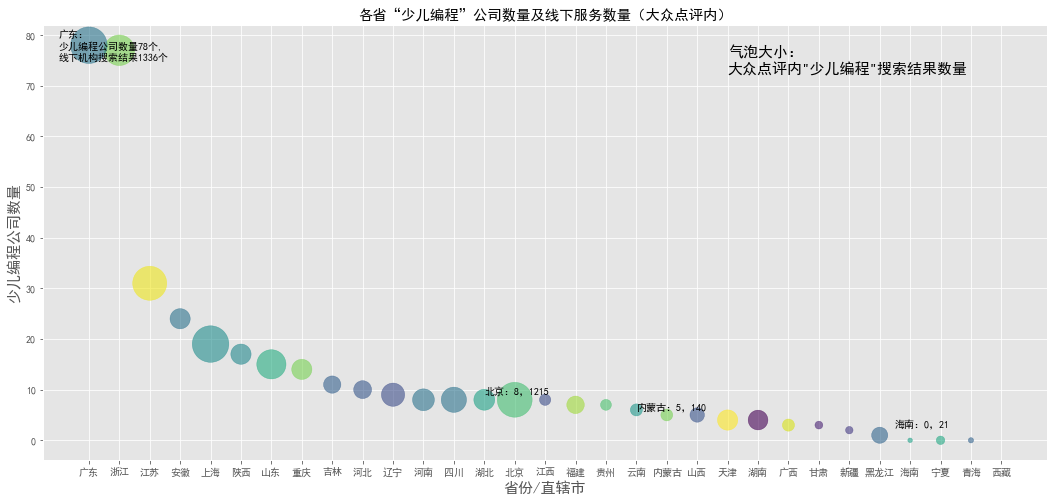

In [13]:
plt.figure(figsize=(18, 8))
plt.style.use('ggplot')

# Draw a graph
colors = np.random.rand(len(dzdp_comp.index))  # 气泡颜色数组
size = dzdp_comp['大众点评搜索数量'] # the size of circle represents the number of search result
plt.scatter(dzdp_comp.index,dzdp_comp['少儿编程公司数量'],  s=size,c = colors, alpha=0.6)

# Add label and annotates 
plt.xlabel('省份/直辖市',fontsize=15)
plt.ylabel('少儿编程公司数量',fontsize=15)
plt.gca().invert_xaxis()
plt.text(x=9,y=72,s = '气泡大小：\n大众点评内"少儿编程"搜索结果数量',fontsize=15,verticalalignment="bottom",horizontalalignment="left")
plt.title('各省“少儿编程”公司数量及线下服务数量（大众点评内）')
plt.annotate("广东：\n少儿编程公司数量78个,\n线下机构搜索结果1336个",(31,75), xycoords='data')
         #xytext=(28, 79),
         #arrowprops=dict(arrowstyle='->'))
plt.annotate("北京：8，1215",(17,9))
plt.annotate("内蒙古：5，140",(12,6))
plt.annotate("海南：0，21",(3.5,2.5))

#plt.savefig('./comp_dzdp_bubble.jpg') # Save the picture
plt.show()
#reference：https://blog.csdn.net/robert_chen1988/article/details/100027423

- **Baidu search index of *Youth programing* by province**

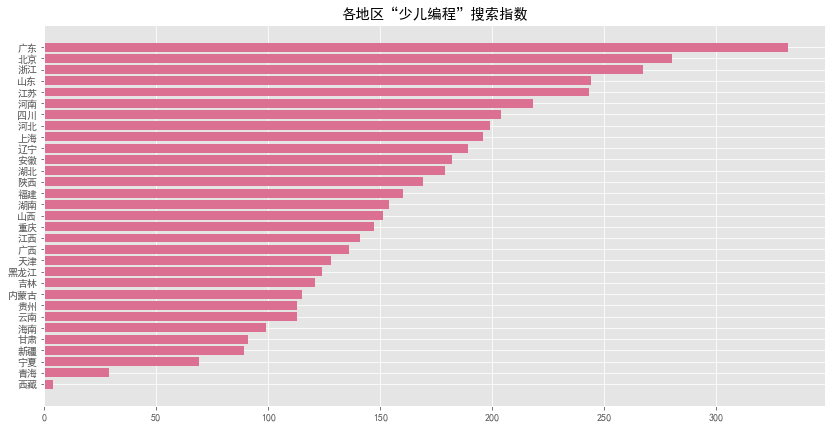

In [13]:
plt.figure(figsize=(14, 7))
plt.barh(baiduss['省份/直辖市'], baiduss['百度搜索指数'],color = 'palevioletred')
plt.title('各地区“少儿编程”搜索指数')
#plt.savefig('./mediacon.jpg')
plt.show()

- **Number of youth programing education enterprise & GDP by porvince**

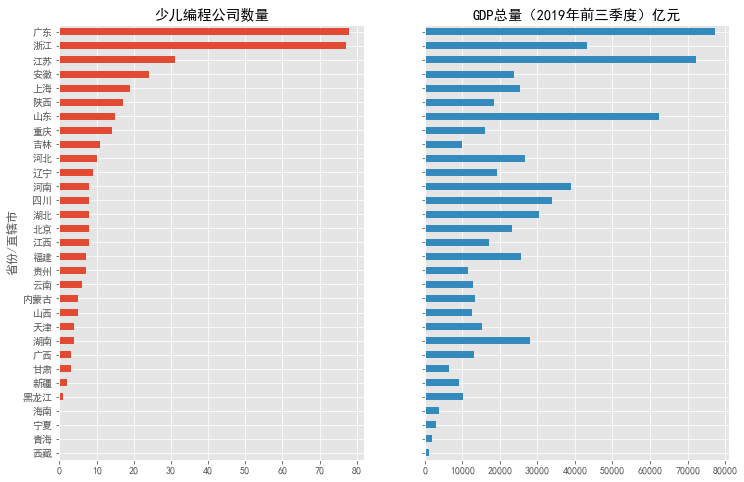

In [14]:
gdp_comp = finaldf.loc[:,['少儿编程公司数量','GDP总量（2019年前三季度）亿元']]
#sns.set_style("white")
gdp_comp.plot(kind = 'barh', subplots = True, layout = (1, 2), sharex = False, sharey = True, legend = False,figsize=(12, 8))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.savefig('./comp_.jpg')
plt.show()

- **The number of offline programming training institutions (via search result on Dianping)& Primary, secondary and high school students population**

In [16]:
schoolpop = schoolpop.dropna()
schoolpop = schoolpop.rename(columns = {'省份':'省份/直辖市'})
zxrkdetail_dzdp = pd.merge(provdzdp_search,schoolpop,how='outer')
zxrkdetail_dzdp = zxrkdetail_dzdp.fillna(0)
zxrkdetail_dzdp = zxrkdetail_dzdp.sort_values(by = '大众点评搜索数量',axis = 0,ascending = False)
zxrkdetail_dzdp.set_index(["省份/直辖市"], inplace=True)
zxrkdetail_dzdp

,大众点评搜索数量,小学（万人）,初中（万人）,高中（万人）,中等职业教育学校（万人）,小初高人口合计（万人）
省份/直辖市,,,,,,
广东,1336.0,988.37,372.47,183.71,86.73,1631.28
上海,1333.0,80.02,43.25,15.82,7.97,147.06
北京,1215.0,18.40,27.90,15.50,9.10,70.90
江苏,1158.0,560.44,225.76,98.08,62.60,946.88
浙江,932.0,360.60,161.50,76.90,52.60,651.60
山东,852.0,726.00,345.70,164.20,75.00,1310.90
四川,636.0,555.50,261.80,139.00,94.20,1050.50
辽宁,539.0,195.50,98.50,60.90,35.00,389.90
河南,477.0,994.60,451.88,210.06,136.63,1793.17


In [17]:
zxrkdetail = zxrkdetail_dzdp[['小学（万人）','初中（万人）','高中（万人）','中等职业教育学校（万人）']]
zxrkdetail

,小学（万人）,初中（万人）,高中（万人）,中等职业教育学校（万人）
省份/直辖市,,,,
广东,988.37,372.47,183.71,86.73
上海,80.02,43.25,15.82,7.97
北京,18.40,27.90,15.50,9.10
江苏,560.44,225.76,98.08,62.60
浙江,360.60,161.50,76.90,52.60
山东,726.00,345.70,164.20,75.00
四川,555.50,261.80,139.00,94.20
辽宁,195.50,98.50,60.90,35.00
河南,994.60,451.88,210.06,136.63


In [18]:
#dzdp_dzdp2 = dzdp_comp.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
#dzdp_comp2

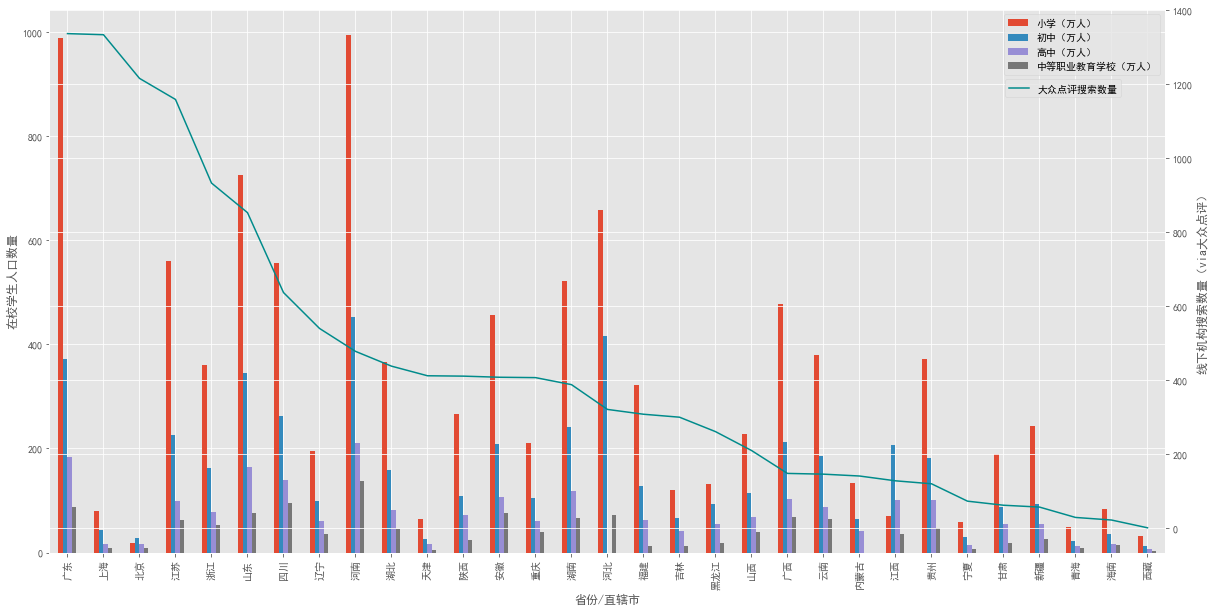

In [23]:
ax = zxrkdetail.plot(kind = 'bar', subplots = False,sharex = True,legend = False,figsize=(20,10))
plt.legend()
ax.set_ylabel('在校学生人口数量')
ax2 = ax.twinx()
ax2.yaxis.set_ticks_position('right') 
ax2.set_ylabel('线下机构搜索数量（via大众点评）')
ax2.plot(zxrkdetail_dzdp.index,'大众点评搜索数量',data = zxrkdetail_dzdp,label='大众点评搜索数量',color = 'darkcyan')
plt.legend(bbox_to_anchor=(0.965,0.88))
plt.savefig('./comp_zxrk_group.jpg')

- **Number of youth programing education enterprises & Internet penetration**

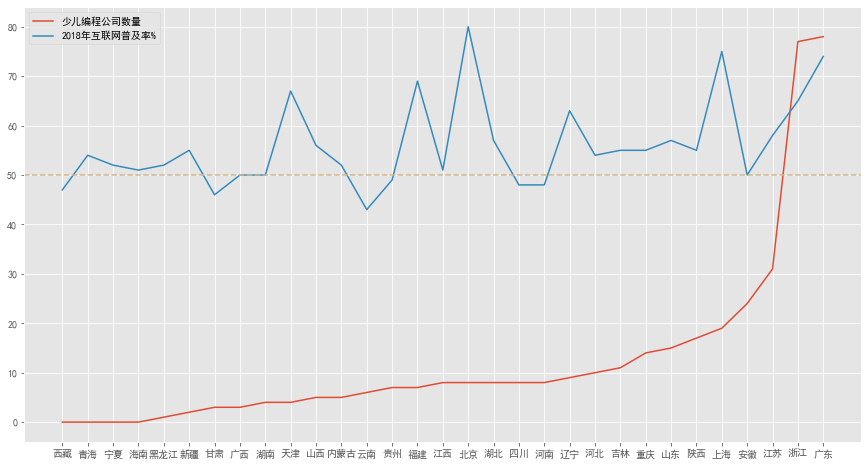

In [26]:
pjl_comp= finaldf.loc[:, ['少儿编程公司数量','2018年互联网普及率%']]
#pjl_comp = pjl_comp.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
plt.figure(figsize = (15,8))

plt.plot(pjl_comp.index,'少儿编程公司数量',data = pjl_comp,label='少儿编程公司数量')
plt.plot(pjl_comp.index,'2018年互联网普及率%',data = pjl_comp,label='2018年互联网普及率%')
plt.axhline(y=50,ls="--",c = 'tan')

plt.legend()
plt.savefig('./comp_pjl_line.jpg')
plt.show()

- **Number of youth programing education enterprise & Baidu search index of *Youth programing* by province**

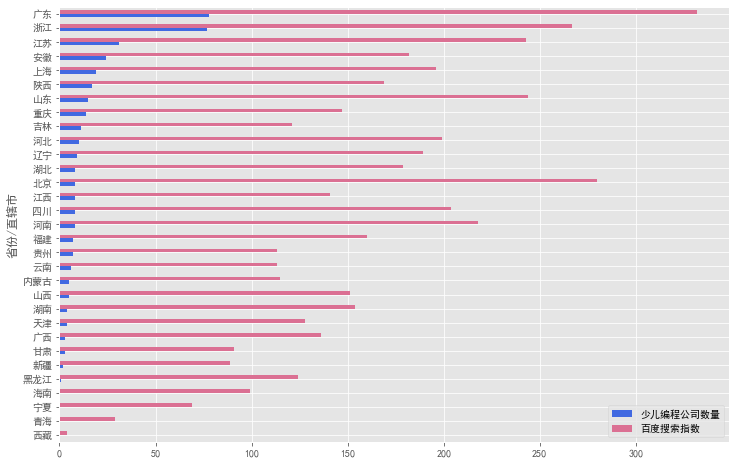

In [27]:
baiduzs = finaldf[['少儿编程公司数量','百度搜索指数']]
baiduzs = baiduzs.sort_values(by = '少儿编程公司数量',axis = 0,ascending = True)
baiduzs.plot(kind = 'barh', subplots = False, layout = (1, 2), sharex = False, sharey = True, legend = False,
               figsize=(12, 8),color=['royalblue','palevioletred'])
plt.legend()
plt.savefig('./comp_media_groupbar.jpg')
plt.show()

- **The correlation matrix between each variable**

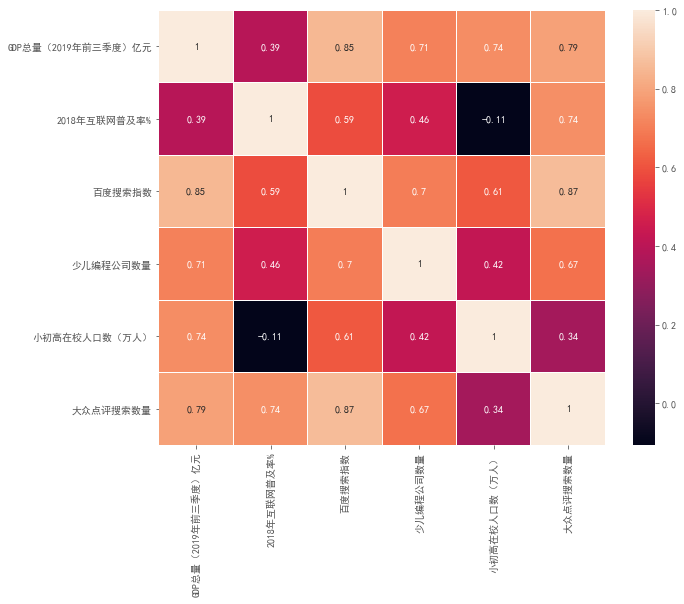

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(finaldf.corr(), annot=True, linewidths=.1)
#plt.savefig('./final.jpg')
plt.show()

In [29]:
finaldf2 = finaldf.sort_values(by = '少儿编程公司数量',axis = 0,ascending = False)
finaldf2_20 = finaldf2.iloc[:20] # 取数量在前20的省份

In [30]:
groupbar20 = finaldf2_20.loc[:, ['少儿编程公司数量','百度搜索指数','大众点评搜索数量']]

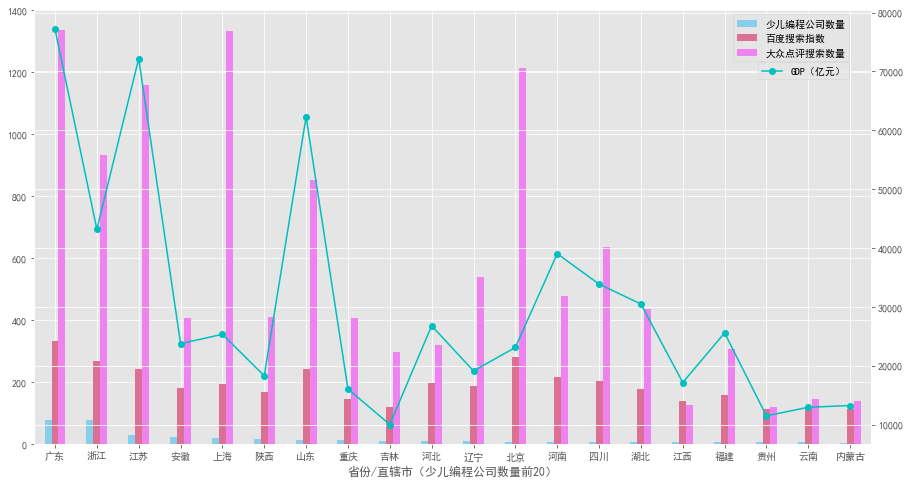

In [31]:
# Plot a grouped bar of '少儿编程公司数量','百度搜索指数','大众点评搜索数量'
axgroup = groupbar20.plot.bar(rot=0,figsize = (15,8),color=['skyblue','palevioletred','violet'])
axgroup.set_xlabel('省份/直辖市（少儿编程公司数量前20）')
plt.legend(bbox_to_anchor=(0.98,1))

# Add a line chart of GDP
axgroup2 = axgroup.twinx()
axgroup2.plot(finaldf2_20.index,'GDP总量（2019年前三季度）亿元',data = finaldf2_20,label='GDP（亿元）',color = "c",marker = 'o')

plt.legend(bbox_to_anchor=(0.98,0.89))
plt.savefig('./final_groupedbar.jpg')
plt.show()